In [1]:
print('233')

233


In [7]:
import matplotlib.pyplot as plt
import json

data_path_dict = {
    'GRPO': '/home/ubuntu/workspace/lsrl/main_12.2_baseline/conventional_v3_rl.log.jsonl',
    'E2GRPO': '/home/ubuntu/hdd/main_12.2_explore_rl/conventional_v2_rl.log.jsonl',
}

if False: # debug
    path = data_path_dict['GRPO']
    jsonl_data = []
    with open(path, 'r') as f:
        for line in f:
            jsonl_data.append(json.loads(line))
    acc_first_iter_first_rollout = jsonl_data[0]['infos'][0]['correct_fn']['accuracy']
    print(acc_first_iter_first_rollout)

accuracy_each_iter_dict = {}
for method, path in data_path_dict.items():
    jsonl_data = []
    with open(path, 'r') as f:
        for line in f:
            jsonl_data.append(json.loads(line))
    accuracy_each_iter = []
    for iter_data in jsonl_data:
        acc_this_iter = []
        for rollout_info in iter_data['infos']:
            acc_this_iter.append(rollout_info['correct_fn']['accuracy'])
        accuracy_each_iter.append(sum(acc_this_iter)/len(acc_this_iter))
    accuracy_each_iter_dict[method] = accuracy_each_iter

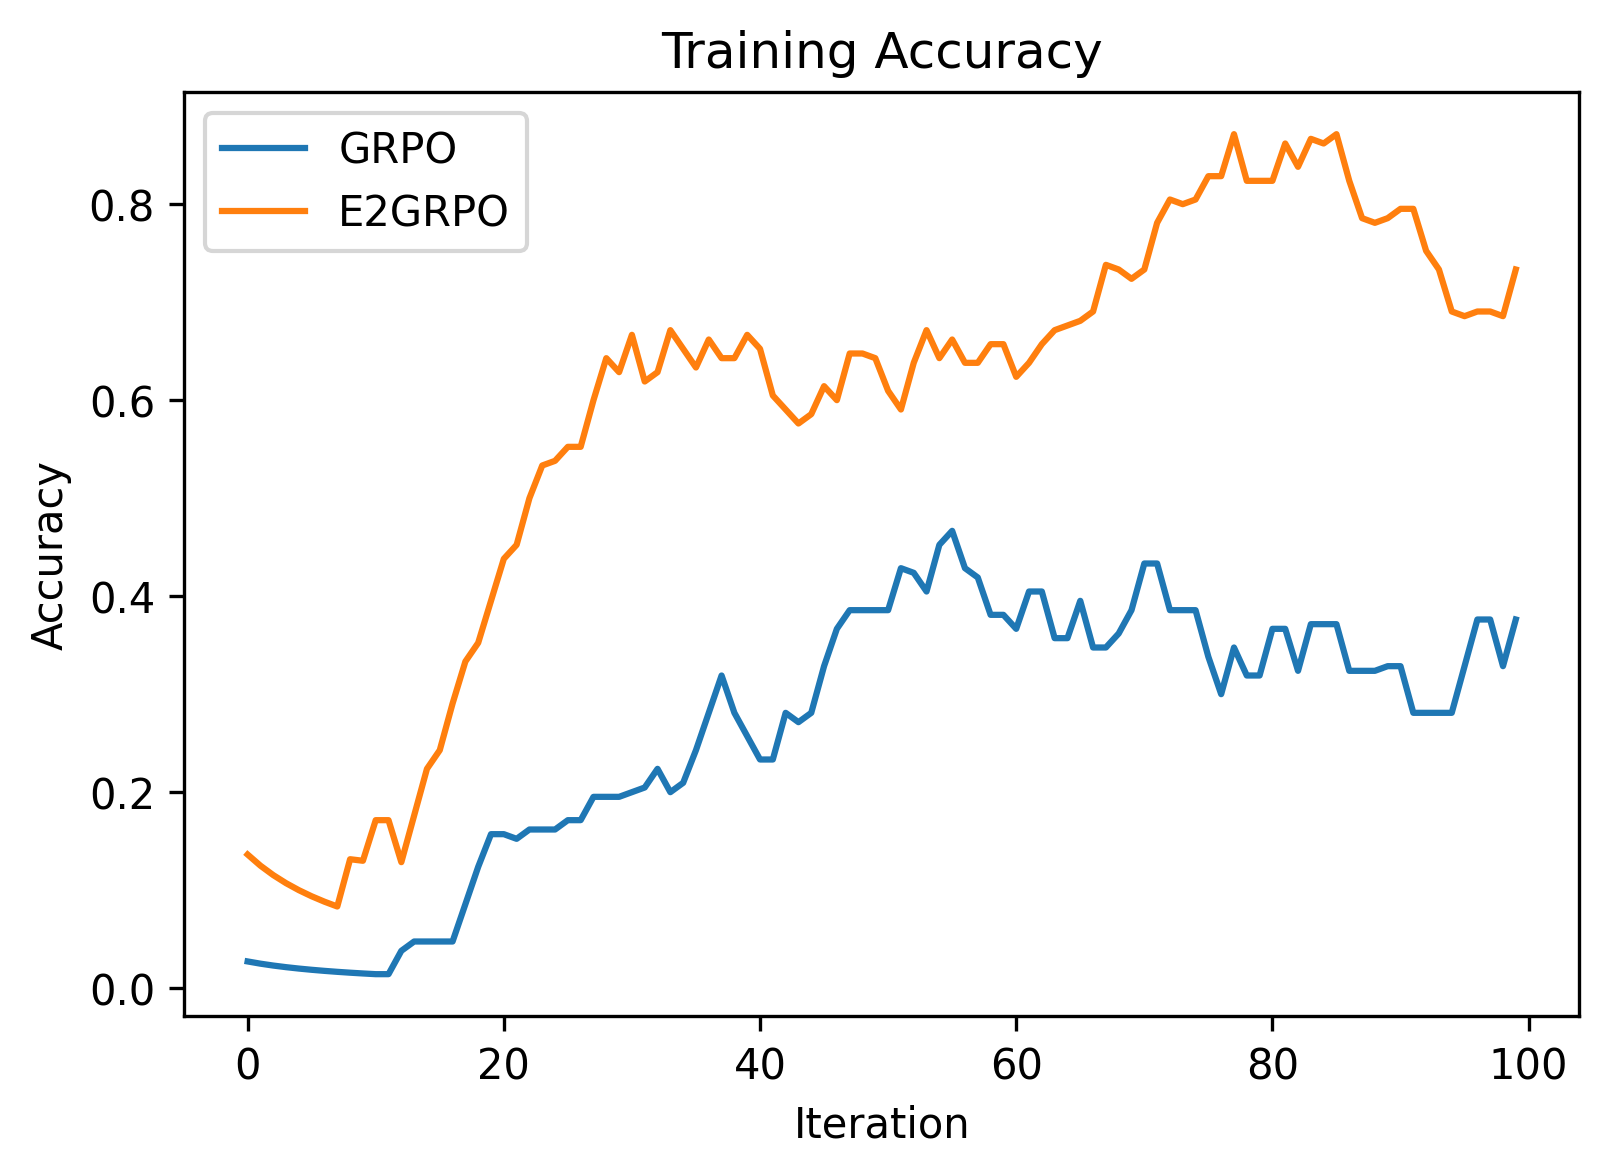

In [14]:
# plot two curves (with strong smoothing)
plt.figure(figsize=(6, 4), dpi=300)
for method, accuracy_each_iter in accuracy_each_iter_dict.items():
    smoothed_acc = []
    window_size = 20
    for i in range(len(accuracy_each_iter)):
        start_idx = max(0, i - window_size // 2)
        end_idx = min(len(accuracy_each_iter), i + window_size // 2 + 1)
        smoothed_acc.append(sum(accuracy_each_iter[start_idx:end_idx]) / (end_idx - start_idx))
    plt.plot(smoothed_acc[:100], label=method)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
# plt.grid()
# plt.savefig('accuracy_plot.png')
plt.show()
